In [1231]:
#STEP-1:IMPORTING NECESSARY LIBRARIES REQUIRED
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
np.random.seed(42)
num_records = 5000
data = {
    'CustomerID': np.arange(1, num_records + 1),
    'Age': np.random.randint(18, 80, size=num_records),
    'Gender': np.random.choice(['Male', 'Female'], size=num_records),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=num_records),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, size=num_records), 2),
    'TotalCharges': np.round(np.random.uniform(20, 5000, size=num_records), 2),
    'TechSupport': np.random.choice(['Yes', 'No'], size=num_records),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=num_records),
    'Tenure': np.random.randint(1, 72, size=num_records),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=num_records),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=num_records),
    'Churn': np.random.choice(['Yes', 'No'], size=num_records)
}

df = pd.DataFrame(data)
missing_indices = np.random.choice(df.index, size=int(num_records * 0.1), replace=False)
df.loc[missing_indices, ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure']] = np.nan
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices, 'MonthlyCharges'] *= 10
df.loc[outlier_indices, 'TotalCharges'] *= 10
churn_indices = np.random.choice(df.index, size=int(num_records * 0.2), replace=False)
df['Churn'] = 'No'
df.loc[churn_indices, 'Churn'] = 'Yes'
print(df.head())
df.to_csv('updated_dataset_with_imbalance.csv', index=False)

   CustomerID   Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1  56.0    Male        One year           70.02       4069.33   
1           2  69.0  Female        Two year           36.06       4703.51   
2           3  46.0  Female        One year           54.07       1691.76   
3           4  32.0  Female        One year           52.40       2658.83   
4           5  60.0  Female  Month-to-month           78.71       3298.48   

  TechSupport InternetService  Tenure PaperlessBilling  \
0         Yes              No    66.0              Yes   
1         Yes             DSL    59.0               No   
2         Yes             DSL    28.0              Yes   
3         Yes     Fiber optic    24.0               No   
4         Yes     Fiber optic    51.0              Yes   

             PaymentMethod Churn  
0  Credit card (automatic)    No  
1             Mailed check   Yes  
2         Electronic check    No  
3  Credit card (automatic)    No  
4         Ele

In [1232]:
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56.0,Male,One year,70.02,4069.33,Yes,No,66.0,Yes,Credit card (automatic),No
1,2,69.0,Female,Two year,36.06,4703.51,Yes,DSL,59.0,No,Mailed check,Yes
2,3,46.0,Female,One year,54.07,1691.76,Yes,DSL,28.0,Yes,Electronic check,No
3,4,32.0,Female,One year,52.40,2658.83,Yes,Fiber optic,24.0,No,Credit card (automatic),No
4,5,60.0,Female,Month-to-month,78.71,3298.48,Yes,Fiber optic,51.0,Yes,Electronic check,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,Female,One year,75.59,693.79,Yes,No,15.0,Yes,Bank transfer (automatic),No
4996,4997,39.0,Female,One year,105.71,2378.62,Yes,DSL,17.0,Yes,Credit card (automatic),No
4997,4998,48.0,Female,One year,43.26,1543.04,No,Fiber optic,9.0,Yes,Mailed check,No
4998,4999,34.0,Male,Two year,100.60,4657.90,No,No,32.0,No,Credit card (automatic),Yes


In [1233]:
#STEP-2:DATA ANALYSIS
df.head(10) #TO DISPLAY FIRST 10 ROWS OF THE DATAFRAME

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56.0,Male,One year,70.02,4069.33,Yes,No,66.0,Yes,Credit card (automatic),No
1,2,69.0,Female,Two year,36.06,4703.51,Yes,DSL,59.0,No,Mailed check,Yes
2,3,46.0,Female,One year,54.07,1691.76,Yes,DSL,28.0,Yes,Electronic check,No
3,4,32.0,Female,One year,52.40,2658.83,Yes,Fiber optic,24.0,No,Credit card (automatic),No
4,5,60.0,Female,Month-to-month,78.71,3298.48,Yes,Fiber optic,51.0,Yes,Electronic check,No
5,6,25.0,Female,One year,26.67,415.77,No,No,21.0,Yes,Credit card (automatic),No
6,7,78.0,Female,One year,102.97,2480.52,No,Fiber optic,31.0,No,Mailed check,No
7,8,38.0,Female,One year,76.24,1815.71,Yes,DSL,50.0,Yes,Bank transfer (automatic),No
8,9,56.0,Female,Month-to-month,87.08,4364.83,No,No,40.0,No,Electronic check,No
9,10,75.0,Female,Two year,90.31,4385.86,No,Fiber optic,68.0,Yes,Credit card (automatic),No


In [1234]:
#INTRODUCING FEATURE i.e.DIFFERENCE FROM AVERAGE USING AVG_MONTHLY_CHARGES- 
avg_monthly_charges = df['MonthlyCharges'].mean()

# Calculate the difference from the average
df['DiffFromAvg'] = df['MonthlyCharges'] - avg_monthly_charges

# Define the threshold for high and low payers
threshold = df['DiffFromAvg'].std()

# Create a new column for payer category
df['PayerCategory'] = df['DiffFromAvg'].apply(lambda x: 'High Payer' if x > threshold else ('Low Payer' if x < -threshold else 'Average Payer'))

# Display the first few rows of the updated DataFrame
print(df.head())


   CustomerID   Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1  56.0    Male        One year           70.02       4069.33   
1           2  69.0  Female        Two year           36.06       4703.51   
2           3  46.0  Female        One year           54.07       1691.76   
3           4  32.0  Female        One year           52.40       2658.83   
4           5  60.0  Female  Month-to-month           78.71       3298.48   

  TechSupport InternetService  Tenure PaperlessBilling  \
0         Yes              No    66.0              Yes   
1         Yes             DSL    59.0               No   
2         Yes             DSL    28.0              Yes   
3         Yes     Fiber optic    24.0               No   
4         Yes     Fiber optic    51.0              Yes   

             PaymentMethod Churn  DiffFromAvg  PayerCategory  
0  Credit card (automatic)    No    -0.747082  Average Payer  
1             Mailed check   Yes   -34.707082  Average Payer  

In [1235]:
df.tail() #TO DISPLAY LAST 10 ROWS OF THE DATAFRAME

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
4995,4996,42.0,Female,One year,75.59,693.79,Yes,No,15.0,Yes,Bank transfer (automatic),No,4.822918,Average Payer
4996,4997,39.0,Female,One year,105.71,2378.62,Yes,DSL,17.0,Yes,Credit card (automatic),No,34.942918,Average Payer
4997,4998,48.0,Female,One year,43.26,1543.04,No,Fiber optic,9.0,Yes,Mailed check,No,-27.507082,Average Payer
4998,4999,34.0,Male,Two year,100.60,4657.90,No,No,32.0,No,Credit card (automatic),Yes,29.832918,Average Payer
4999,5000,72.0,Female,Two year,37.93,1111.62,Yes,DSL,66.0,No,Mailed check,No,-32.837082,Average Payer


In [1236]:
df.info() #TO DISPLAY THE DATATYPE OF EACH FEATURES, NON NULL COUNT OF VALUES OF EACH FEATURE.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   int32  
 1   Age               4500 non-null   float64
 2   Gender            5000 non-null   object 
 3   ContractType      5000 non-null   object 
 4   MonthlyCharges    4500 non-null   float64
 5   TotalCharges      4500 non-null   float64
 6   TechSupport       5000 non-null   object 
 7   InternetService   5000 non-null   object 
 8   Tenure            4500 non-null   float64
 9   PaperlessBilling  5000 non-null   object 
 10  PaymentMethod     5000 non-null   object 
 11  Churn             5000 non-null   object 
 12  DiffFromAvg       4500 non-null   float64
 13  PayerCategory     5000 non-null   object 
dtypes: float64(5), int32(1), object(8)
memory usage: 527.5+ KB


In [996]:
df.describe() #DESCRIBING THE STATISTICAL FEATURES OF ALL NUMERIC COLUMNS.

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,DiffFromAvg
count,5000.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,2500.500000,48.831556,70.767082,2539.004838,35.835556,7.831760e-15
std,1443.520003,17.901091,37.180618,1980.952774,20.383075,3.718062e+01
min,1.000000,18.000000,20.010000,20.870000,1.000000,-5.075708e+01
25%,1250.750000,34.000000,45.640000,1255.897500,18.000000,-2.512708e+01
50%,2500.500000,49.000000,69.805000,2480.160000,35.000000,-9.620822e-01
75%,3750.250000,64.000000,94.345000,3669.345000,53.000000,2.357792e+01
max,5000.000000,79.000000,998.900000,48156.400000,71.000000,9.281329e+02


In [997]:
df.iloc[:,3] #DISPLAYING THE ENTIRE ROW OF A PARTICULAR COLUMN i.e"ContractType"

0             One year
1             Two year
2             One year
3             One year
4       Month-to-month
             ...      
4995          One year
4996          One year
4997          One year
4998          Two year
4999          Two year
Name: ContractType, Length: 5000, dtype: object

In [998]:
df.loc[2,"TotalCharges"] #TO PICKOUT THE SINGLE ROW VALUE OF A PARTICULAR COLUMN, here ROW IS 2 and COLUMN IS "TotalCharges"

1691.76

In [999]:
#DISPLAYING UNIQUE VALUES OF ALL THE COLUMNS

In [1000]:
df["Age"].unique()  #AGE CONTAINS SOME NAN VALUES.

array([56., 69., 46., 32., 60., 25., 78., 38., 75., 36., 40., 28., 41.,
       70., 53., 57., 20., 39., 19., 61., 47., 55., 77., nan, 50., 29.,
       42., 66., 44., 76., 59., 45., 33., 79., 72., 74., 54., 68., 24.,
       26., 35., 21., 31., 67., 43., 37., 64., 34., 23., 71., 51., 27.,
       48., 65., 62., 58., 18., 52., 22., 30., 49., 73., 63.])

In [1001]:
df["Gender"].unique()  #IT IS A CATEGORICAL COLUMN WITH MALE AND FEMALE USERS.

array(['Male', 'Female'], dtype=object)

In [1002]:
df["ContractType"].unique() #IT IS A CATEGORIACL COLUMN WITH CONTRACTS FOR A PERIOD OF ONE YEAR,TWO YEARS AND THREE YEARS.

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [1003]:
df["MonthlyCharges"].unique()

array([ 70.02,  36.06,  54.07, ..., 105.71,  43.26,  37.93])

In [1004]:
df["TotalCharges"].unique() 

array([4069.33, 4703.51, 1691.76, ..., 1543.04, 4657.9 , 1111.62])

In [1005]:
df["TechSupport"].unique() #IT IS A CATEGORICAL COLUMN WITH YES AND NO.

array(['Yes', 'No'], dtype=object)

In [1006]:
df["InternetService"].unique() #IT IS AGAIN A CATEGORICAL COLUMN WITH 3 TYPES OF INTERNET SERVICES i.e. "NO"[no internet service],"DSL","FIBER OPTIC"

array(['No', 'DSL', 'Fiber optic'], dtype=object)

In [1007]:
df["Tenure"].unique() #A NUMERICAL COLUMN WITH NAN VALUE.

array([66., 59., 28., 24., 51., 21., 31., 50., 40., 68., 16., 63., 56.,
       15., 42.,  5., 48., 13., 32., 67., 30.,  6., 25., 62., nan, 18.,
       69., 58., 47.,  7., 55., 22., 35., 26., 34., 61., 44., 43., 33.,
       10., 23., 39., 45., 52., 11., 17., 27., 64., 14.,  2.,  1., 54.,
       38., 49.,  4., 70.,  9., 65., 41., 46., 36., 29.,  8., 37., 19.,
       57.,  3., 53., 20., 60., 12., 71.])

In [1008]:
df["PaperlessBilling"].unique() #AGAIN THIS IS A CATEGORICAL COLUMN.

array(['Yes', 'No'], dtype=object)

In [1009]:
df["PaymentMethod"].unique() #A CATEGORICAL COLUMN WITH 4 TYPES OF PAYMENT METHODS i.e.credit card, mailed chcek etc..

array(['Credit card (automatic)', 'Mailed check', 'Electronic check',
       'Bank transfer (automatic)'], dtype=object)

In [1010]:
df["Churn"].unique() #A CATEGORICAL DEPENDENT COLUMN WITH TWO TYPES OF TARGET YES AND NO.

array(['No', 'Yes'], dtype=object)

In [1011]:
df["PayerCategory"].unique()

array(['Average Payer', 'Low Payer', 'High Payer'], dtype=object)

In [1012]:
#VALUE_COUNTS & RESET_INDEX DISPLAYS ALL THE COUNT OF VALUES OF TENURE IN DESCENDING ORDER.


In [1013]:
df["Tenure"].value_counts().reset_index()

,Tenure,count
0,27.0,87
1,52.0,86
2,5.0,86
3,32.0,82
4,26.0,80
...,...,...
66,1.0,51
67,19.0,49
68,34.0,49
69,51.0,43


In [1014]:
#SO TENURE WITH VALUE 27 HAS HIGHEST COUNT AND GRADUALLY DECREASES.

In [1015]:
df["MonthlyCharges"].value_counts().reset_index()

,MonthlyCharges,count
0,90.54,5
1,76.78,5
2,55.64,4
3,104.20,4
4,45.26,4
...,...,...
3667,94.70,1
3668,21.05,1
3669,21.52,1
3670,106.12,1


In [1016]:
#STEP-3: DATA PREPROCESSING:
#EXPLORATORY DATA ANALYSIS-OUTLIERS,NULL VALUES, ENCODING.
df


,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,Male,One year,70.02,4069.33,Yes,No,66.0,Yes,Credit card (automatic),No,-0.747082,Average Payer
1,2,69.0,Female,Two year,36.06,4703.51,Yes,DSL,59.0,No,Mailed check,Yes,-34.707082,Average Payer
2,3,46.0,Female,One year,54.07,1691.76,Yes,DSL,28.0,Yes,Electronic check,No,-16.697082,Average Payer
3,4,32.0,Female,One year,52.40,2658.83,Yes,Fiber optic,24.0,No,Credit card (automatic),No,-18.367082,Average Payer
4,5,60.0,Female,Month-to-month,78.71,3298.48,Yes,Fiber optic,51.0,Yes,Electronic check,No,7.942918,Average Payer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,Female,One year,75.59,693.79,Yes,No,15.0,Yes,Bank transfer (automatic),No,4.822918,Average Payer
4996,4997,39.0,Female,One year,105.71,2378.62,Yes,DSL,17.0,Yes,Credit card (automatic),No,34.942918,Average Payer
4997,4998,48.0,Female,One year,43.26,1543.04,No,Fiber optic,9.0,Yes,Mailed check,No,-27.507082,Average Payer
4998,4999,34.0,Male,Two year,100.60,4657.90,No,No,32.0,No,Credit card (automatic),Yes,29.832918,Average Payer


In [1017]:
#ENCODING CATEGORICAL COLUMNS
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["ContractType"]=le.fit_transform(df["ContractType"])
df["TechSupport"]=le.fit_transform(df["TechSupport"])
df["InternetService"]=le.fit_transform(df["InternetService"])
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"]=le.fit_transform(df["PaymentMethod"])
df["Churn"]=le.fit_transform(df["Churn"])
df["PayerCategory"]=le.fit_transform(df["PayerCategory"])

In [1018]:
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0
1,2,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0
2,3,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0
3,4,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0
4,5,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0
4996,4997,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0
4997,4998,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0
4998,4999,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0


In [1019]:
df["PayerCategory"].loc[12]

1

In [1020]:
#NOW, IN GENDER- 1 denotes MALE & 0 denotes FEMALE.
#CONTRACT TYPE- 0 denotes MONTH TO MONTH CONTRACT, 1 denotes ONE YEAR CONTRACT, 2 DENOTES TWO YEAR CONTRACT.
#TECH SUPPORT- 0 denotes NO and 1 denotes YES.
#INTERNET SERVICE - 0 denotes DSL, 1 denotes FIBER OPTIC, 2 denotes DCL.
#PAPER BILLING- 0 denotes NO and 1 denotes YES.
#PAPERLESSBILLING- 0 denotes 'Bank transfer (automatic)',1 denotes Credit card (automatic)', 2 denotes 'Mailed check' and 
                   # 3 denotes 'Electronic check'.
#CHURN(TARGET COLUMN)- 0 denotes NO, 1 denotes YES.
#PAYERCATEGORY -0 denotes "AVERAGECATEGORY", 1 denotes "HIGH CATEGORY",2 dentes "LOW CATEGORY".

In [1021]:
df.describe()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
count,5000.000000,4500.000000,5000.000000,5000.000000,4500.000000,4500.000000,5000.000000,5000.000000,4500.000000,5000.000000,5000.00000,5000.00000,4.500000e+03,5000.000000
mean,2500.500000,48.831556,0.498800,0.986400,70.767082,2539.004838,0.500800,0.974800,35.835556,0.495000,1.52040,0.20000,7.831760e-15,0.349200
std,1443.520003,17.901091,0.500049,0.817036,37.180618,1980.952774,0.500049,0.829158,20.383075,0.500025,1.11939,0.40004,3.718062e+01,0.687426
min,1.000000,18.000000,0.000000,0.000000,20.010000,20.870000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,-5.075708e+01,0.000000
25%,1250.750000,34.000000,0.000000,0.000000,45.640000,1255.897500,0.000000,0.000000,18.000000,0.000000,1.00000,0.00000,-2.512708e+01,0.000000
50%,2500.500000,49.000000,0.000000,1.000000,69.805000,2480.160000,1.000000,1.000000,35.000000,0.000000,2.00000,0.00000,-9.620822e-01,0.000000
75%,3750.250000,64.000000,1.000000,2.000000,94.345000,3669.345000,1.000000,2.000000,53.000000,1.000000,3.00000,0.00000,2.357792e+01,0.000000
max,5000.000000,79.000000,1.000000,2.000000,998.900000,48156.400000,1.000000,2.000000,71.000000,1.000000,3.00000,1.00000,9.281329e+02,2.000000


In [1022]:
#CHECKING FOR NULL VALUES:
df.isnull().sum()

CustomerID            0
Age                 500
Gender                0
ContractType          0
MonthlyCharges      500
TotalCharges        500
TechSupport           0
InternetService       0
Tenure              500
PaperlessBilling      0
PaymentMethod         0
Churn                 0
DiffFromAvg         500
PayerCategory         0
dtype: int64

In [1023]:
#IT SHOWS THE NUMERICAL COLUMNS- AGE,MONTHLY CHARGES, TOTAL CHARGES,TENURE HAVE NULL VALUES AND CATEGORICAL COLUMNS 
#HAS NO NULL VALUES. SO NOW WE WILL REMOVE THE NULL VALUES OF THE NUMERICAL COLUMNS.

In [1024]:
#SINCE THE VALUES ARE CONTINUOUS SO WE WILL FILL THE NULL VALUES BY mean().
age_mean=df["Age"].mean()
df["Age"]=df["Age"].fillna(age_mean)

monthlycharge_mean=df["MonthlyCharges"].mean()
df["MonthlyCharges"]=df["MonthlyCharges"].fillna(monthlycharge_mean)

totalcharge_mean=df["TotalCharges"].mean()
df["TotalCharges"]=df["TotalCharges"].fillna(totalcharge_mean)

tenure_mean=df["Tenure"].mean()
df["Tenure"]=df["Tenure"].fillna(tenure_mean)

diff_from_avg_mean=df["DiffFromAvg"].mean()
df["DiffFromAvg"]=df["DiffFromAvg"].fillna(diff_from_avg_mean)

In [1025]:
df.isnull().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalCharges        0
TechSupport         0
InternetService     0
Tenure              0
PaperlessBilling    0
PaymentMethod       0
Churn               0
DiffFromAvg         0
PayerCategory       0
dtype: int64

In [1026]:
#HENCE THE NULL VALUES GOT REMOVED OF THE NUMERICAL COLUMNS.
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0
1,2,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0
2,3,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0
3,4,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0
4,5,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0
4996,4997,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0
4997,4998,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0
4998,4999,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0


In [1027]:
#CHECKING FOR DUPLICATED VALUES:
df.duplicated().sum()

0

In [1028]:
#HENCE NO DUPLICATED VALUES ARE THERE.

<Axes: ylabel='Age'>

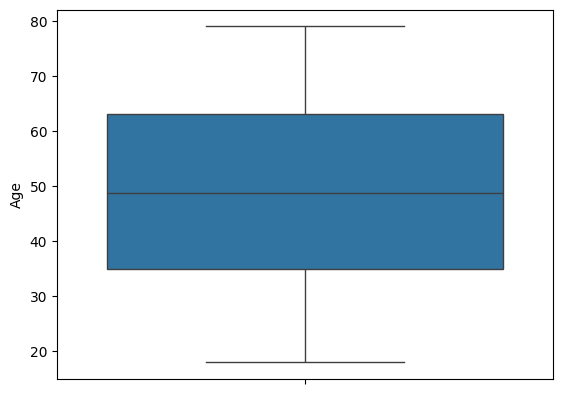

In [1029]:
#CHECKING FOR OUTLIERS.
sns.boxplot(df["Age"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

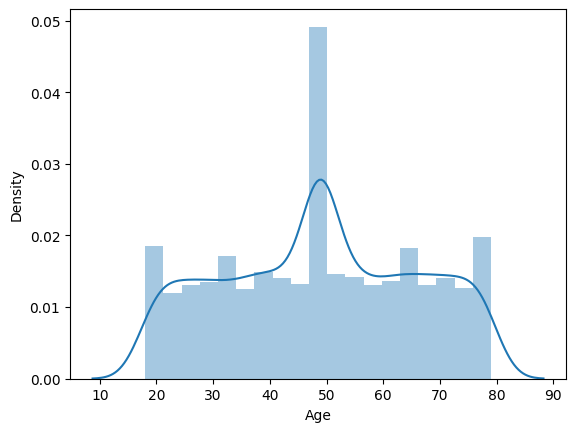

In [1030]:
sns.distplot(df["Age"])

In [1031]:
#HENCE AGE COLUMN HAS NO OUTLIERS AS VIEWED FROM THE BOX PLOT.

<Axes: ylabel='Gender'>

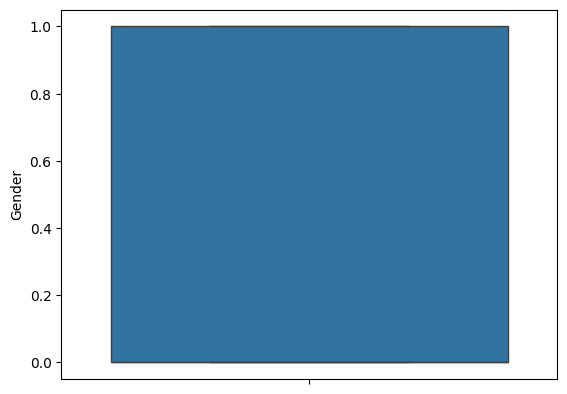

In [1032]:
sns.boxplot(df["Gender"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2342188561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Gender"])


<Axes: xlabel='Gender', ylabel='Density'>

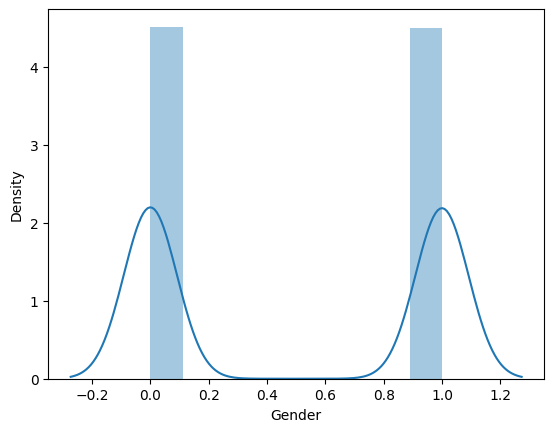

In [1033]:
sns.distplot(df["Gender"])

In [1034]:
#GENDER COLUMN HAS NO OUTLIERS AND THE DISTRIBUTION IS NORMAL DISTRIBUTION.

<Axes: ylabel='ContractType'>

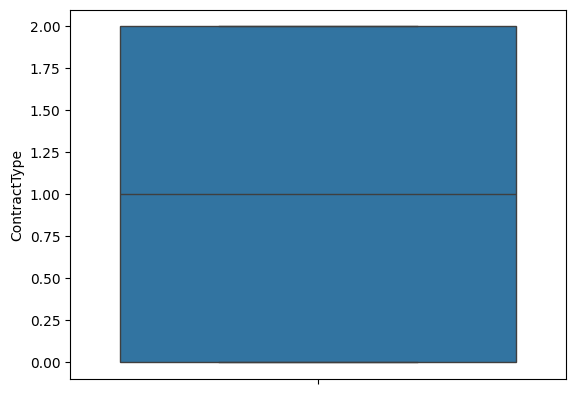

In [1035]:
sns.boxplot(df["ContractType"]) #	MonthlyCharge

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2514189078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ContractType"])


<Axes: xlabel='ContractType', ylabel='Density'>

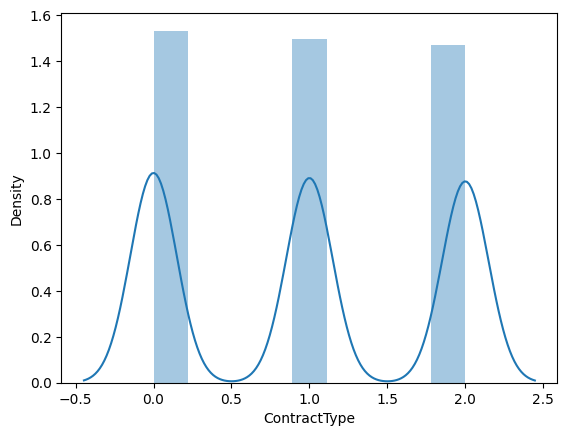

In [1036]:
sns.distplot(df["ContractType"])

In [1037]:
#CONTRACT TYPE HAS NO OUTLIERS AS WELL AS THE DISTRIBUTION IS NORMAL.

<Axes: ylabel='MonthlyCharges'>

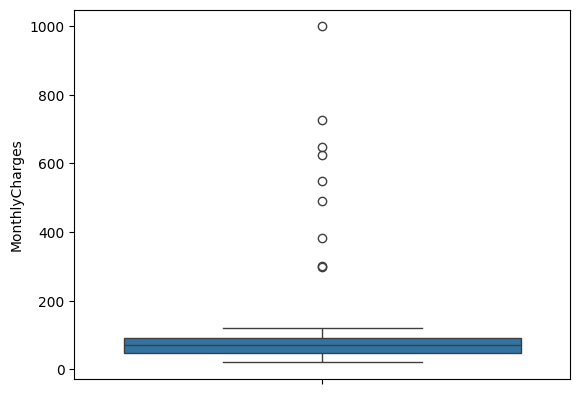

In [1038]:
sns.boxplot(df["MonthlyCharges"]) 

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\663888963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MonthlyCharges"])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

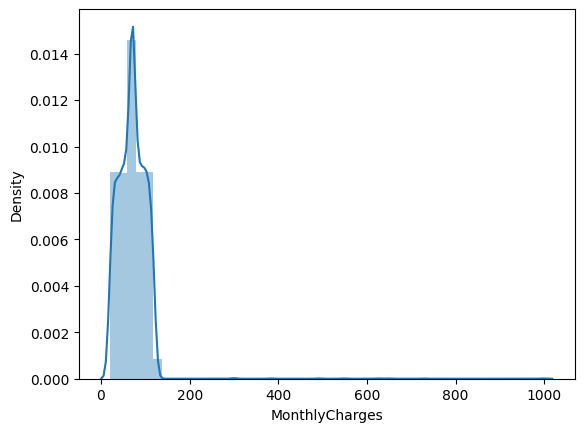

In [1039]:
sns.distplot(df["MonthlyCharges"])

In [1040]:
#HENCE WE SEE THAT THE MONTHLY CHARGES COLUMN HAS OUTLIERS ALONG WITH SKEWED DISTRIBUTION.

In [1041]:
#SINCE THE DISTRIBUTION IS POSITIVELY SKEWED. HENCE WE WILL USE INTERQUARTILE RANGE METHOD TO REMOVE OUTLIERS BY CAPPING.
Q1_monthlycharge=df["MonthlyCharges"].quantile(0.25)
Q3_monthlycharge=df["MonthlyCharges"].quantile(0.75)
IQR_monthlycharge=Q3_monthlycharge-Q1_monthlycharge

LOW_monthlycharge=Q1_monthlycharge-(IQR_monthlycharge * 1.5)
HIGH_monthlycharge=Q3_monthlycharge+(IQR_monthlycharge *1.5)

In [1042]:
df[(df["MonthlyCharges"]<LOW_monthlycharge) | (df["MonthlyCharges"]>HIGH_monthlycharge)]

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
665,666,69.0,1,1,624.8,41694.4,1,2,7.0,0,2,0,554.032918,1
868,869,71.0,1,1,648.0,22144.5,1,0,42.0,0,0,0,577.232918,1
1021,1022,48.0,1,2,726.5,12278.5,1,0,25.0,0,3,0,655.732918,1
1870,1871,72.0,1,0,299.2,47646.6,1,1,27.0,0,1,0,228.432918,1
1995,1996,52.0,0,2,382.9,14149.6,0,0,32.0,1,0,0,312.132918,1
2267,2268,63.0,0,2,490.8,27122.7,1,2,7.0,0,0,1,420.032918,1
3115,3116,66.0,1,2,998.9,15673.1,1,0,45.0,1,1,0,928.132918,1
3794,3795,77.0,1,1,547.6,48156.4,0,1,52.0,1,1,0,476.832918,1
3845,3846,66.0,1,0,300.3,42093.1,0,2,31.0,0,3,0,229.532918,1


In [1043]:
#SO THESE ROWS HAVE OUTLIERS. NOW WE HAVE REMOVE THEM BY CAPPING. BECAUSE DROPPING THE OUTLIERS WOULD REMOVE SOME RECORDS CONTAINING MEANING INFORMATIONS.


In [1044]:
#CAPPING
df["MonthlyCharges"]=np.where(df["MonthlyCharges"]<LOW_monthlycharge,LOW_monthlycharge,np.where(df["MonthlyCharges"]>HIGH_monthlycharge,
                HIGH_monthlycharge,df["MonthlyCharges"]))

In [1045]:
df[(df["MonthlyCharges"]<LOW_monthlycharge) | (df["MonthlyCharges"]>HIGH_monthlycharge)]

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory


<Axes: ylabel='MonthlyCharges'>

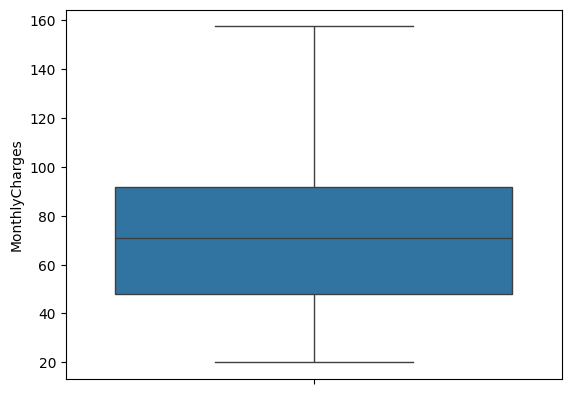

In [1046]:
sns.boxplot(df["MonthlyCharges"])

In [1047]:
#HENCE REMOVED THE OUTLIERS.

<Axes: ylabel='TotalCharges'>

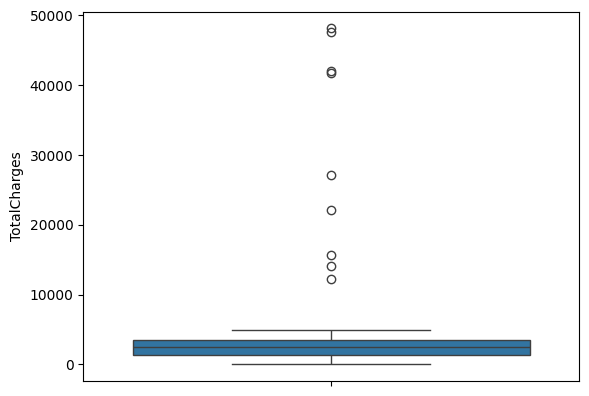

In [1048]:
sns.boxplot(df["TotalCharges"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2249770721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalCharges"])


<Axes: xlabel='TotalCharges', ylabel='Density'>

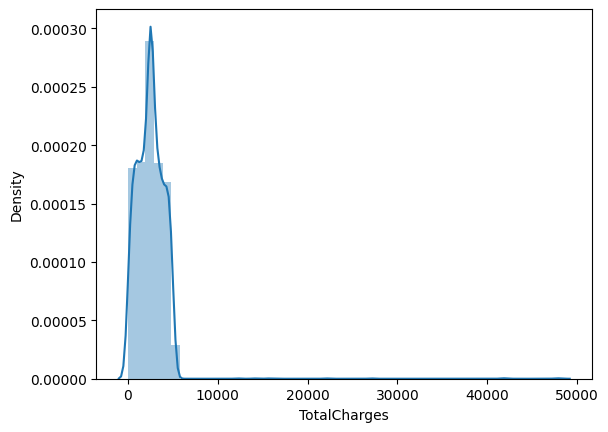

In [1049]:
sns.distplot(df["TotalCharges"])

In [1050]:
#SINCE THE DISTRIBUTION IS POSITIVELY SKEWED,HENCE WE WILL USE INTERQUARTILE RANGE METHOD TO REMOVE OUTLIERS BY CAPPING.
Q1_totalcharge=df["TotalCharges"].quantile(0.25)
Q3_totalcharge=df["TotalCharges"].quantile(0.75)
IQR_totalcharge=Q3_totalcharge-Q1_totalcharge

LOW_totalcharge=Q1_totalcharge-(IQR_totalcharge * 1.5)
HIGH_totalcharge=Q3_totalcharge+(IQR_totalcharge *1.5)

In [1051]:
df[(df["TotalCharges"]<LOW_totalcharge) | (df["TotalCharges"]>HIGH_totalcharge)]

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
665,666,69.0,1,1,157.48,41694.4,1,2,7.0,0,2,0,554.032918,1
868,869,71.0,1,1,157.48,22144.5,1,0,42.0,0,0,0,577.232918,1
1021,1022,48.0,1,2,157.48,12278.5,1,0,25.0,0,3,0,655.732918,1
1870,1871,72.0,1,0,157.48,47646.6,1,1,27.0,0,1,0,228.432918,1
1995,1996,52.0,0,2,157.48,14149.6,0,0,32.0,1,0,0,312.132918,1
2267,2268,63.0,0,2,157.48,27122.7,1,2,7.0,0,0,1,420.032918,1
3115,3116,66.0,1,2,157.48,15673.1,1,0,45.0,1,1,0,928.132918,1
3794,3795,77.0,1,1,157.48,48156.4,0,1,52.0,1,1,0,476.832918,1
3845,3846,66.0,1,0,157.48,42093.1,0,2,31.0,0,3,0,229.532918,1


In [1052]:
#SO THESE ROWS HAVE OUTLIERS. NOW WE HAVE REMOVE THEM BY CAPPING. BECAUSE DROPPING THE OUTLIERS WOULD REMOVE SOME RECORDS CONTAINING MEANING INFORMATIONS.


In [1053]:
#CAPPING
df["TotalCharges"]=np.where(df["TotalCharges"]<LOW_totalcharge,LOW_totalcharge,np.where(df["TotalCharges"]>HIGH_totalcharge,
                HIGH_totalcharge,df["TotalCharges"]))

In [1054]:
df[(df["TotalCharges"]<LOW_totalcharge) | (df["TotalCharges"]>HIGH_totalcharge)]

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory


<Axes: ylabel='TotalCharges'>

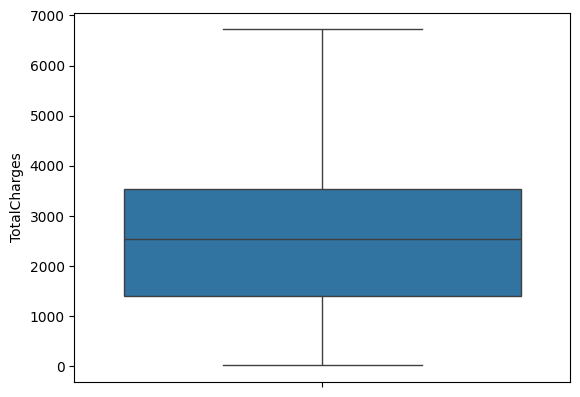

In [1055]:
sns.boxplot(df["TotalCharges"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2249770721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalCharges"])


<Axes: xlabel='TotalCharges', ylabel='Density'>

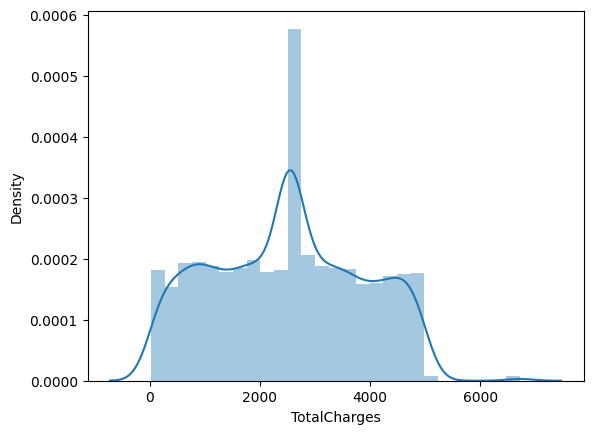

In [1056]:
sns.distplot(df["TotalCharges"])

In [1057]:
#HENCE IT GOT REMOVED.


<Axes: ylabel='TechSupport'>

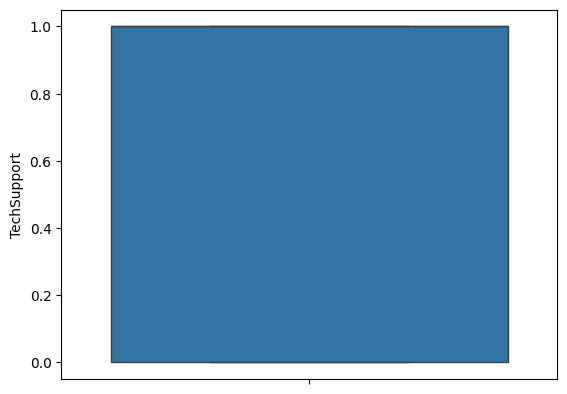

In [1058]:
sns.boxplot(df["TechSupport"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\309732491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TechSupport"])


<Axes: xlabel='TechSupport', ylabel='Density'>

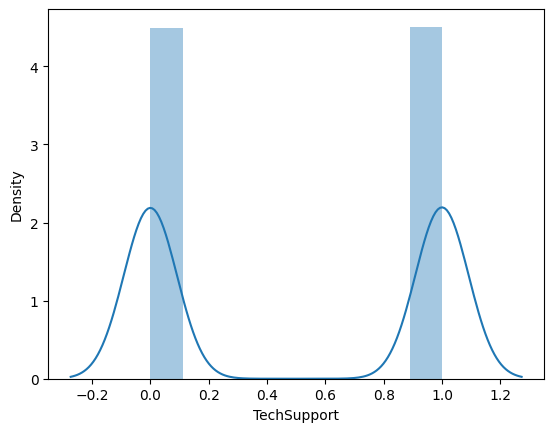

In [1059]:
sns.distplot(df["TechSupport"])

In [1060]:
#TECH SUPPORT COLUMN HAS NO OUTLIERS.

<Axes: ylabel='InternetService'>

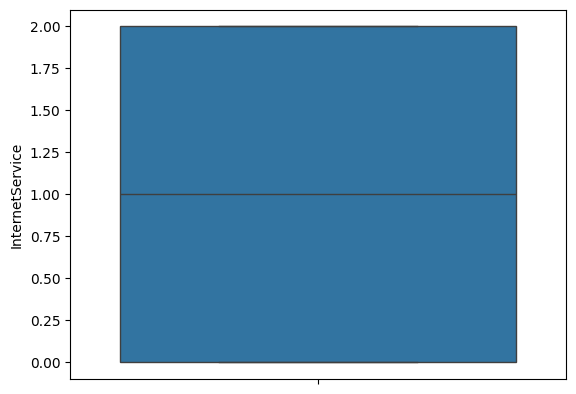

In [1061]:
sns.boxplot(df["InternetService"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2703852043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["InternetService"])


<Axes: xlabel='InternetService', ylabel='Density'>

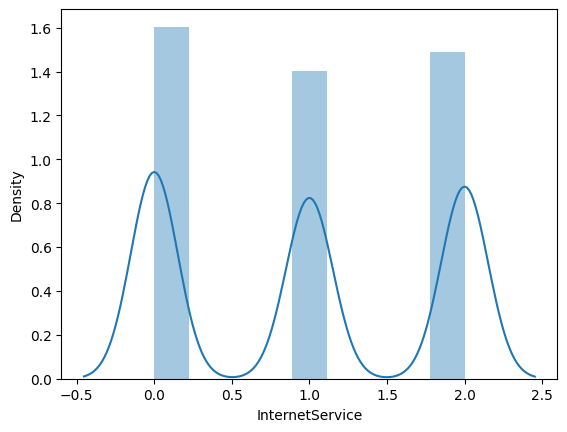

In [1062]:
sns.distplot(df["InternetService"])

In [1063]:
#INTERNETSERVICE COLUMN HAS NO OUTLIERS.

<Axes: ylabel='Tenure'>

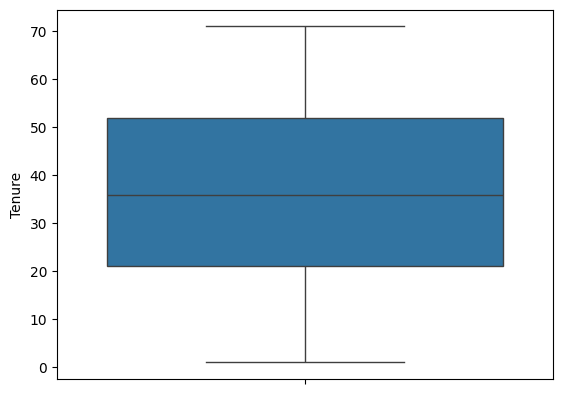

In [1064]:
sns.boxplot(df["Tenure"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\2987230410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure"])


<Axes: xlabel='Tenure', ylabel='Density'>

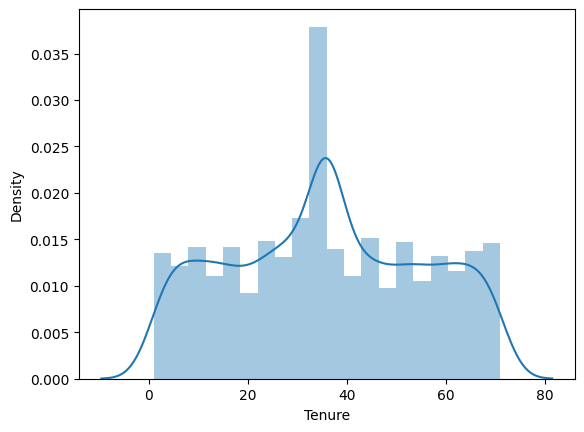

In [1065]:
sns.distplot(df["Tenure"])

In [1066]:
#HENCE THE TENURE COLUMN HAS NO OUTLIERS.

<Axes: ylabel='PaperlessBilling'>

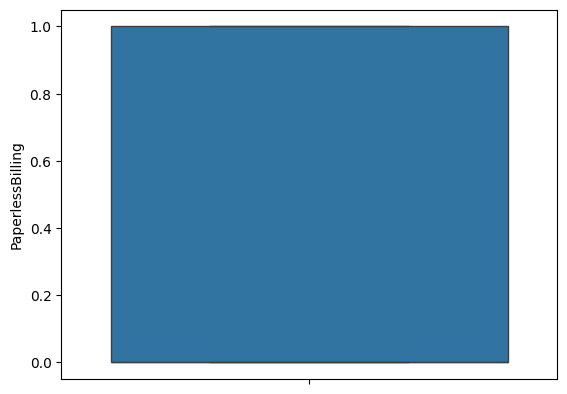

In [1067]:
sns.boxplot(df["PaperlessBilling"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\4163759927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PaperlessBilling"])


<Axes: xlabel='PaperlessBilling', ylabel='Density'>

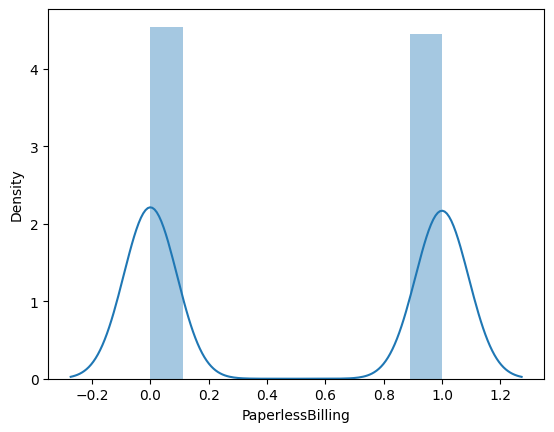

In [1068]:
sns.distplot(df["PaperlessBilling"])

In [1069]:
#HENCE THE PAPERLESSBILLING COLUMN HAS NO OUTLIERS.

<Axes: ylabel='Churn'>

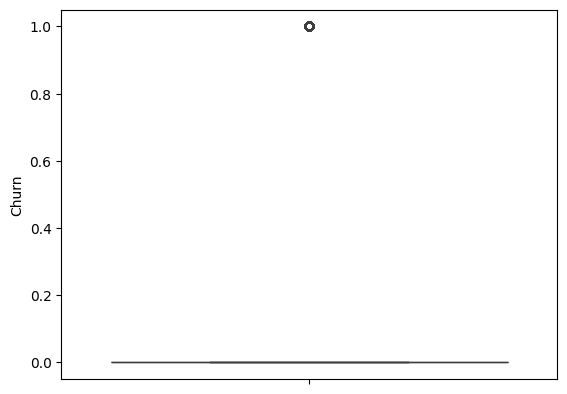

In [1070]:
sns.boxplot(df["Churn"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\787206158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Churn"])


<Axes: xlabel='Churn', ylabel='Density'>

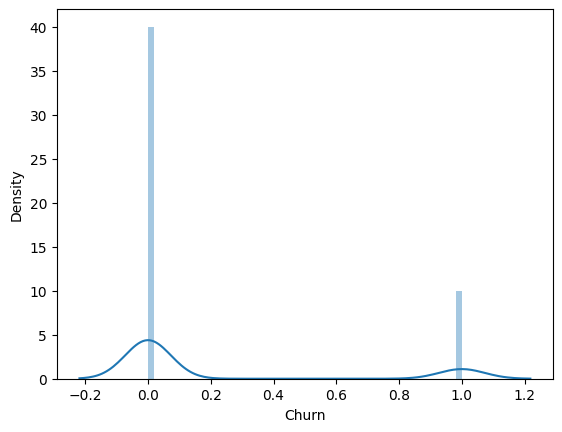

In [1071]:
sns.distplot(df["Churn"])

In [1072]:
#HENCE THE CHURN COLUMN ALSO HAS NO OUTLIERS.

In [1073]:
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0
1,2,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0
2,3,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0
3,4,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0
4,5,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0
4996,4997,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0
4997,4998,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0
4998,4999,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0


<Axes: ylabel='PayerCategory'>

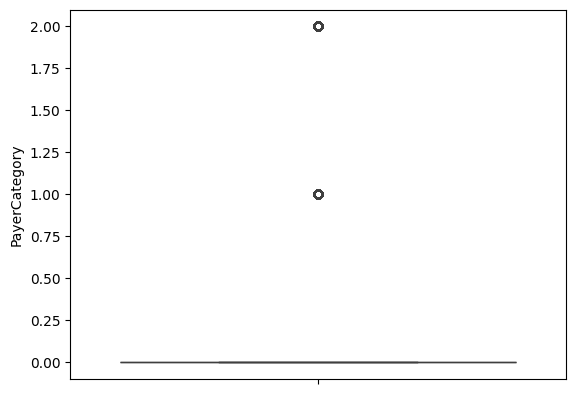

In [1074]:
sns.boxplot(df["PayerCategory"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_17944\1067025633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PayerCategory"])


<Axes: xlabel='PayerCategory', ylabel='Density'>

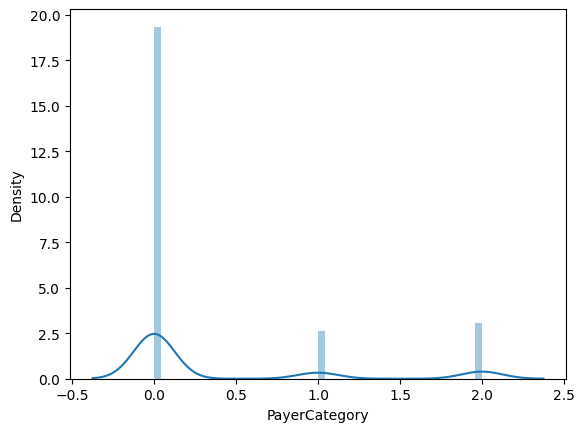

In [1075]:
sns.distplot(df["PayerCategory"])

In [1076]:
#SO PAYERCATEGORY HAS OUTLIERS ALONG WITH A POSITIVE SKEWED DISTRIBUTION. HENCE WE WILL USE INTERQUARTILE RANGE METHOD TO REMOVE OUTLIERS BY CAPPING.

In [1077]:
Q1_PC=df["PayerCategory"].quantile(0.25)
Q3_PC=df["PayerCategory"].quantile(0.75)

In [1078]:
IQR_PC=Q3_PC-Q1_PC
LOW_PC=Q1_PC-(IQR_PC*1.5)
HIGH_PC=Q3_PC+(IQR_PC*1.5)

In [1079]:
df[(df["PayerCategory"]<LOW_PC) | (df["PayerCategory"]>HIGH_PC)]

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
5,6,25.0,0,1,26.67,415.77,0,2,21.0,1,1,0,-44.097082,2
12,13,28.0,0,0,115.62,3673.77,0,2,56.0,0,2,0,44.852918,1
14,15,41.0,0,2,116.96,2034.51,0,1,28.0,0,3,0,46.192918,1
17,18,57.0,1,2,26.45,3625.52,0,1,42.0,0,1,1,-44.317082,2
30,31,50.0,1,1,26.65,4479.95,0,0,68.0,1,0,1,-44.117082,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4977,79.0,1,0,30.24,2310.90,1,2,20.0,0,0,0,-40.527082,2
4977,4978,72.0,1,0,33.15,3441.38,1,0,25.0,0,1,0,-37.617082,2
4986,4987,58.0,0,0,23.22,3051.19,1,2,50.0,1,2,1,-47.547082,2
4987,4988,47.0,0,0,109.58,217.53,0,0,16.0,0,0,1,38.812918,1


In [1080]:
df["PayerCategory"]=np.where(df["PayerCategory"]<LOW_PC,LOW_PC,np.where(df["PayerCategory"]>HIGH_PC,HIGH_PC,df["PayerCategory"]))

In [1081]:
df[(df["PayerCategory"]<LOW_PC) | (df["PayerCategory"]>HIGH_PC)]


,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory


In [1082]:
#HENCE OUTLIERS HAS BEEN REMOVED.

In [1084]:

#STEP-4: COLLINEARITY:
#CHECKING FOR COLLINEARITY:i.e. relationship between dependent and independent columns 
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0.0
1,2,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0.0
2,3,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0.0
3,4,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0.0
4,5,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0.0
4996,4997,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0.0
4997,4998,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0.0
4998,4999,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0.0


In [1085]:
df1=df.drop(["CustomerID"],axis=1)
df1

,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0.0
1,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0.0
2,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0.0
3,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0.0
4,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0.0
4996,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0.0
4997,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0.0
4998,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0.0


In [1086]:
corre=df1.corr()
corre

,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
Age,1.000000,-0.020612,-0.008501,0.022005,-0.017464,0.006745,-0.019418,0.017314,0.020322,0.021584,0.006962,0.035926,NaN
Gender,-0.020612,1.000000,-0.030886,0.012652,0.021820,0.024004,0.012954,0.000331,0.012377,-0.005317,0.012200,0.023957,NaN
ContractType,-0.008501,-0.030886,1.000000,0.009508,0.012956,-0.025923,0.016325,0.008504,-0.019263,0.000085,-0.006365,0.019413,NaN
MonthlyCharges,0.022005,0.012652,0.009508,1.000000,0.019793,0.014943,0.010268,-0.018248,0.000198,0.010519,0.014339,0.841405,NaN
TotalCharges,-0.017464,0.021820,0.012956,0.019793,1.000000,-0.015091,0.004388,-0.016135,0.011545,0.004884,0.000788,0.079009,NaN
TechSupport,0.006745,0.024004,-0.025923,0.014943,-0.015091,1.000000,-0.028899,0.002324,0.004416,0.002115,0.010200,0.023389,NaN
InternetService,-0.019418,0.012954,0.016325,0.010268,0.004388,-0.028899,1.000000,-0.018895,-0.025876,0.010899,0.021832,0.000500,NaN
Tenure,0.017314,0.000331,0.008504,-0.018248,-0.016135,0.002324,-0.018895,1.000000,0.029186,0.004333,-0.010969,-0.018569,NaN
PaperlessBilling,0.020322,0.012377,-0.019263,0.000198,0.011545,0.004416,-0.025876,0.029186,1.000000,0.017158,0.020001,-0.003543,NaN
PaymentMethod,0.021584,-0.005317,0.000085,0.010519,0.004884,0.002115,0.010899,0.004333,0.017158,1.000000,-0.000179,0.002933,NaN


<Figure size 2000x2000 with 0 Axes>

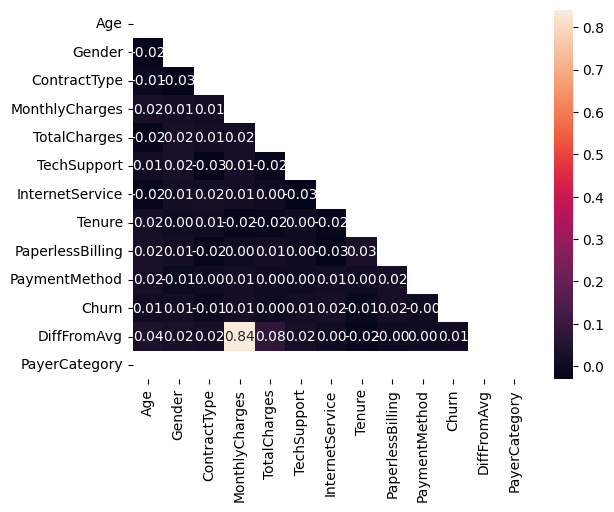

<Figure size 2000x2000 with 0 Axes>

In [1087]:
#PLOTTING COLLINEARITY MATRIX.
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,annot=True,fmt=".2f")
plt.figure(figsize=(20,20))

In [1088]:
#SO FROM THE ABOVE CORRELATION MATRIX WE CAN SEE NEITHER OF THE INDEPENDENT COLUMNS IS NOT HIGHLY CORRELATED TO DEPENDENT i.e. churn 
#COLUMN.
# ALSO SOME INDEPENDENT COLUMNS ARE NEITHER CORRELATED TO THEMSELVES, SO THERE IS NO MULTICOLLINEARITY, BUT SOME COLUMNS i.e. MonthlyCharges and DiffFromAvg
#ARE CORRELATED AND THERE IS MULTICOLLINEARITY. SO LETS CHECK FURTHER WHETHER CONSIDERING THIS FEATURES AFFECTS OUR MODEL OR NOT.

In [1089]:
#STEP-5: DATA VISUALISATION.
df.columns

Index(['CustomerID', 'Age', 'Gender', 'ContractType', 'MonthlyCharges',
       'TotalCharges', 'TechSupport', 'InternetService', 'Tenure',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'DiffFromAvg',
       'PayerCategory'],
      dtype='object')

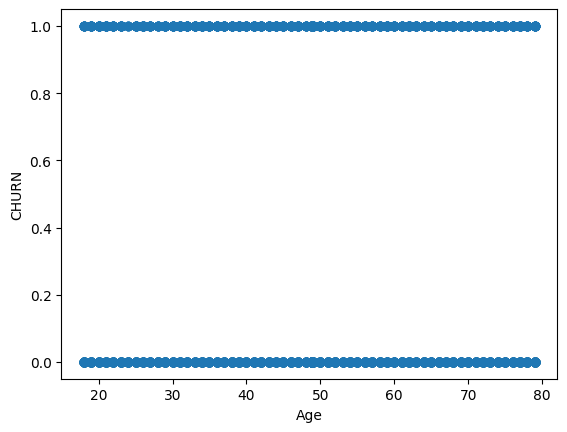

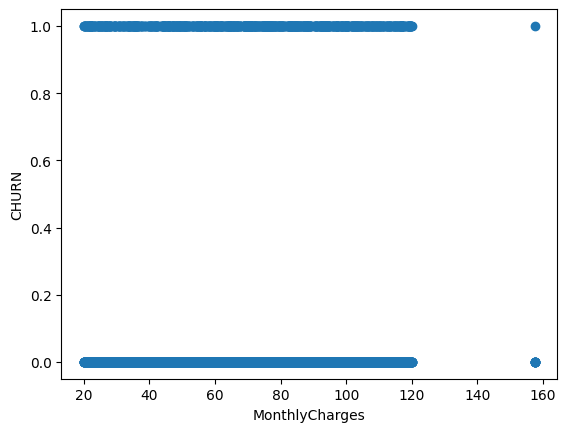

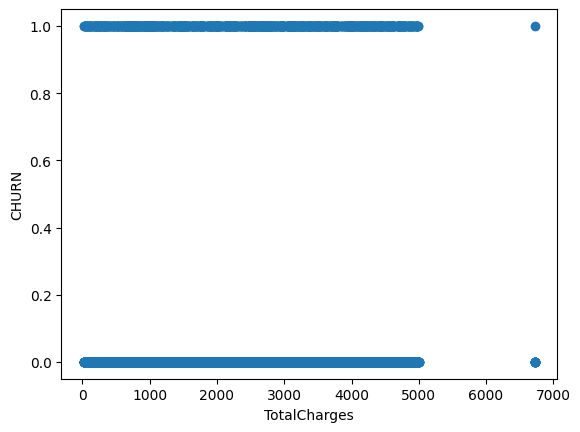

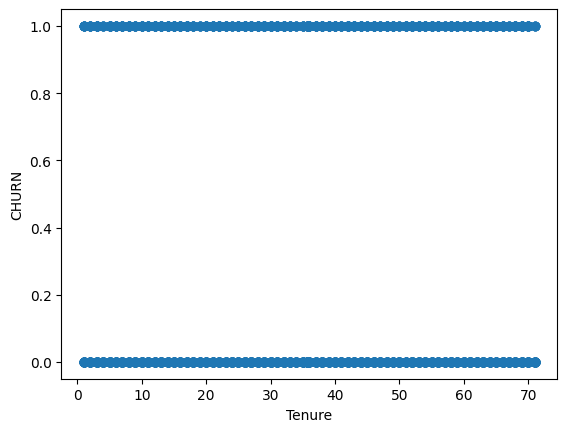

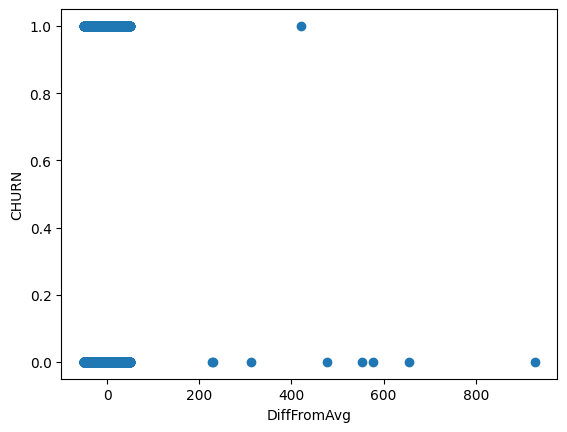

In [1090]:
#NUMERICAL COLUMNS VISUALISATION:i.e.
num_columns=['Age','MonthlyCharges','TotalCharges','Tenure','DiffFromAvg']
for col in num_columns:
    plt.scatter(x=df[col],y=df["Churn"])
    plt.xlabel(col)
    plt.ylabel("CHURN")
    plt.show()

In [1091]:
#SO JUST THE ABOVE VISUALISATION CLEARLY DEPICTS THAT THE NUMERICAL FEATURES PRESENT ARE NOT THAT DEPENDENT ON CHURN RATE SO FURTHER ON FEATURE SELECTION 
#WILL HELP US TO EVALUATE THE FEATURES FOR BUILDING THE MODEL.

<Axes: xlabel='Gender', ylabel='count'>

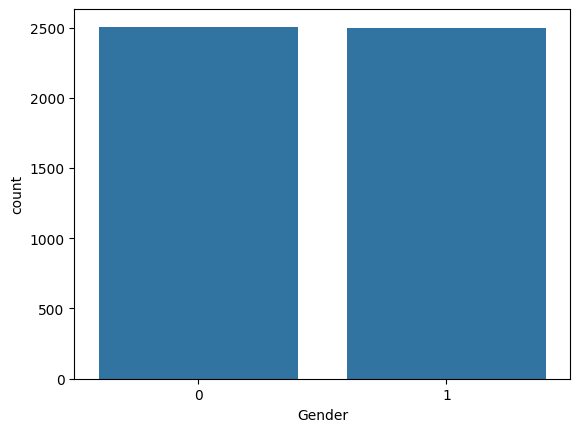

In [1092]:
#BAR CHART PLOT FOR CATEGORICAL COLUMNS:
cat_col=["Gender","ContractType","TechSupport","InternetService","PaperlessBilling","PaymentMethod","Churn"]
sns.countplot(data=df,x="Gender")

<Axes: xlabel='ContractType', ylabel='count'>

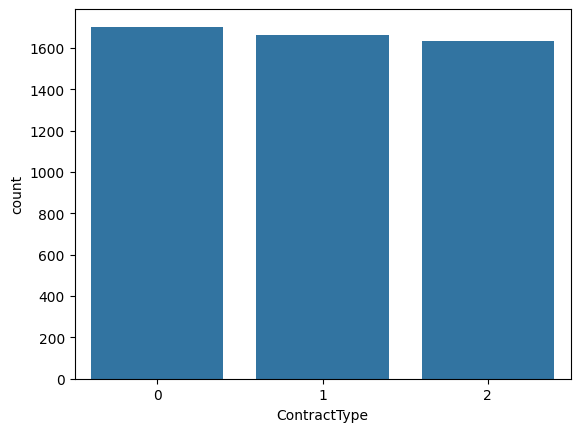

In [1093]:
sns.countplot(data=df,x="ContractType")

In [1094]:
#SO THE CONTRACTTYPE COLUMN HAS "month-to-month" contract more than "one-year" contract than "two-year" contract.

<Axes: xlabel='TechSupport', ylabel='count'>

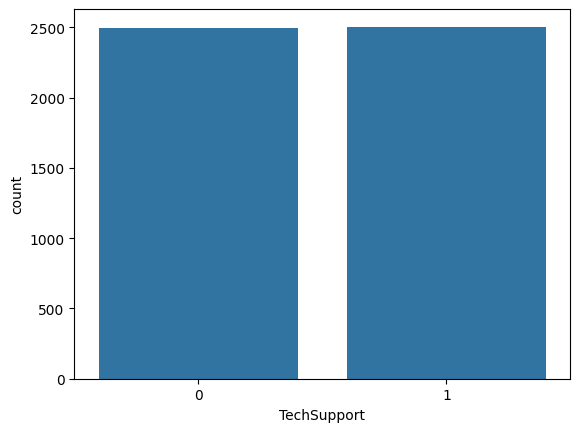

In [1095]:
sns.countplot(data=df,x="TechSupport")

<Axes: xlabel='InternetService', ylabel='count'>

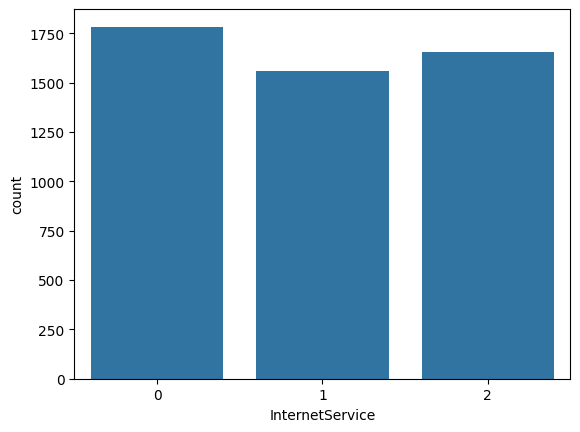

In [1096]:
sns.countplot(data=df,x="InternetService")

In [1097]:
#InternetService COLUMN HAS "fibre-optic" service count more than "dsl" service count than "no" service.

<Axes: xlabel='PaperlessBilling', ylabel='count'>

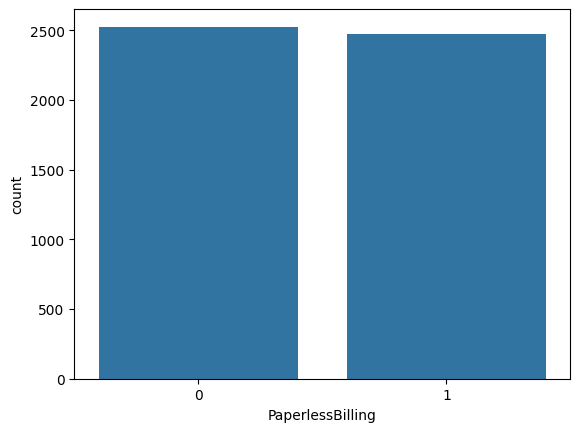

In [1098]:
sns.countplot(data=df,x="PaperlessBilling")

<Axes: xlabel='PaymentMethod', ylabel='count'>

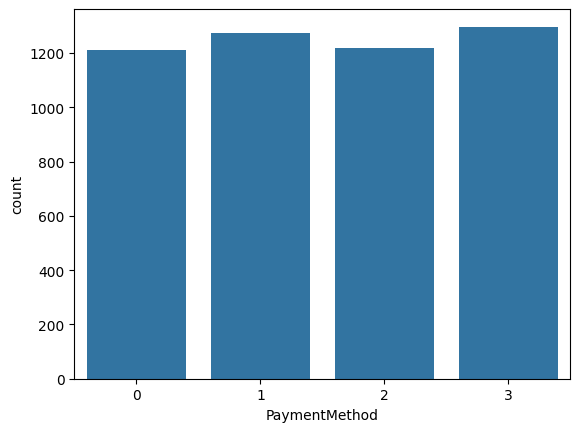

In [1099]:
sns.countplot(data=df,x="PaymentMethod")

In [1100]:
#SO THE PaymentMethod column has "mailed" payment count more than "credit card" count than "bank account" and "electronic" count.

<Axes: xlabel='Churn', ylabel='count'>

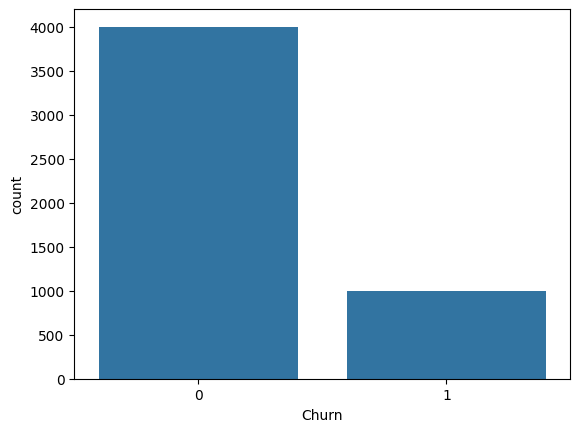

In [1101]:
sns.countplot(data=df,x="Churn")

In [ ]:
#SO WE SEE THAT OUR TARGET COLUMN i.e. Churn is IMBALANCED COLUMN SO WE HAVE TO DEAL WITH IMBALANCE CLASSIFICATION.


In [1103]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#CHURN IS OUR TARGET VARIABLE
x= df.drop(['Churn'], axis=1)
y= df['Churn']

# SPLITTING DATA INTO TRAINING AND TESTING
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#APPLYING SMOTE TO HANDLE IMBALANCE DATA.
smote = SMOTE(random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(xtrain, ytrain)

#CHECKING DISTRIBUTION OF TARGET VARIABLE AFTER HANDLING IMBALANCE DATA.
print(ytrain_balanced.value_counts())


Churn
0    3204
1    3204
Name: count, dtype: int64


In [1211]:
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,DiffFromAvg,PayerCategory
0,1,56.0,1,1,70.02,4069.33,1,2,66.0,1,1,0,-0.747082,0.0
1,2,69.0,0,2,36.06,4703.51,1,0,59.0,0,3,1,-34.707082,0.0
2,3,46.0,0,1,54.07,1691.76,1,0,28.0,1,2,0,-16.697082,0.0
3,4,32.0,0,1,52.40,2658.83,1,1,24.0,0,1,0,-18.367082,0.0
4,5,60.0,0,0,78.71,3298.48,1,1,51.0,1,2,0,7.942918,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42.0,0,1,75.59,693.79,1,2,15.0,1,0,0,4.822918,0.0
4996,4997,39.0,0,1,105.71,2378.62,1,0,17.0,1,1,0,34.942918,0.0
4997,4998,48.0,0,1,43.26,1543.04,0,1,9.0,1,3,0,-27.507082,0.0
4998,4999,34.0,1,2,100.60,4657.90,0,2,32.0,0,1,1,29.832918,0.0


In [1212]:
#STEP-6: FEATURE SELECTION:
#USING EXTRA TREE CLASSIFIER.
x1=df.drop(["Churn","CustomerID"],axis=1)
y1=df["Churn"]
from sklearn.ensemble import ExtraTreesClassifier
tree1=ExtraTreesClassifier()
tree1.fit(x1,y1)

ExtraTreesClassifier()

In [1213]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'ContractType', 'MonthlyCharges',
       'TotalCharges', 'TechSupport', 'InternetService', 'Tenure',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'DiffFromAvg',
       'PayerCategory'],
      dtype='object')

In [1214]:
col=['Age', 'Gender', 'ContractType', 'MonthlyCharges',
       'TotalCharges', 'TechSupport', 'InternetService', 'Tenure',
       'PaperlessBilling', 'PaymentMethod','DiffFromAvg',
       'PayerCategory']
feature=pd.Series(tree1.feature_importances_,index=col)

In [1215]:
feature

Age                 0.145291
Gender              0.025681
ContractType        0.068444
MonthlyCharges      0.144014
TotalCharges        0.149063
TechSupport         0.028248
InternetService     0.048928
Tenure              0.144453
PaperlessBilling    0.019454
PaymentMethod       0.082485
DiffFromAvg         0.143939
PayerCategory       0.000000
dtype: float64

In [1216]:
#SO FROM THE ABOVE CHART WE SEE SOME OF THE COLUMNS ARE NOT AT ALL INVOLVED IN PREDICTING THE HIGH RISK OF CHURN BUT SOME CAN BE USED FOR PREDICTING  
#i.e."Age","MonthlyCharges","TotalCharges","Tenure","Diff_from_avg" THE RISK OF CHURN A CUSTOMER IS AT. SO LETS BUILD THE MODEL USING THIS 
#SELECTED FEATURES AND SEE HOW IT PERFORMS.


In [1217]:
#SO FROM THE ABOVE METHOD WE SEE THAT "TotalCharges" column is the most effective feature amongst all and then we can take "Avg_monthly_charges",
#"Tenure","MonthlyCharges","Gender".

In [1218]:
#STEP-7: MODEL BUILDING PART1 USING 2 FEATURES FROM EXTRA TREE CLASSIFIER.
x2=df[["Age","MonthlyCharges"]]
y2=df["Churn"]

In [1219]:
xtrain_balanced,xtest,ytrain_balanced,ytest=train_test_split(x2,y2,test_size=0.3)


In [1220]:
#MODEL1: LOGISTIC REGRESSION
model1=LogisticRegression()
model1.fit(xtrain_balanced,ytrain_balanced)

LogisticRegression()

In [1221]:
model1.score(xtrain_balanced,ytrain_balanced)

0.8048571428571428

In [1222]:
ypred1=model1.predict(xtest)
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [1223]:
model1.score(xtest,ytest)

0.7886666666666666

In [1228]:


# Confusion matrix
conf_matrix = confusion_matrix(ypred1,ytest)
print(conf_matrix)

[[1183  317]
 [   0    0]]


In [1229]:
from sklearn.metrics import classification_report
cr=classification_report(ypred1,ytest,output_dict=True)
CR=pd.DataFrame(cr).transpose()
CR

C:\Users\trigo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trigo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trigo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

,precision,recall,f1-score,support
0,1.000000,0.788667,0.881849,1500.000000
1,0.000000,0.000000,0.000000,0.000000
accuracy,0.788667,0.788667,0.788667,0.788667
macro avg,0.500000,0.394333,0.440924,1500.000000
weighted avg,1.000000,0.788667,0.881849,1500.000000


In [1129]:
#so my model is not performing well and is unable to distinguish between the classes effectively.

In [940]:
#MODEL2:KNN(K NEAREST NEIGHBORS)
model2=KNeighborsClassifier()

In [1130]:
model2.fit(xtrain_balanced,ytrain_balanced)

KNeighborsClassifier()

In [1131]:
model2.score(xtrain_balanced,ytrain_balanced)

0.8128571428571428

In [1132]:
yprob = model2.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.2
Recall = 0.04966887417218543
F1 Score = 0.07957559681697612
[[1138   60]
 [ 287   15]]


In [1133]:
#True Negatives (TN): 1138 (Top-left) - Correctly predicted negative cases.
#False Positives (FP): 60 (Top-right) - Incorrectly predicted positive cases.
#False Negatives (FN): 287 (Bottom-left) - Incorrectly predicted negative cases.
#True Positives (TP): 15 (Bottom-right) - Correctly predicted positive cases.

In [1134]:
model2.score(xtest,ytest)

0.7686666666666667

In [ ]:
#MY MODEL NEEDS MORE IMPOROVEMENTS.

In [1141]:
#MODEL3:NAIVE BAYES.
model3=GaussianNB()
model3.fit(xtrain_balanced,ytrain_balanced)

GaussianNB()

In [1142]:
model3.score(xtrain_balanced,ytrain_balanced)

0.8005714285714286

In [1143]:
yprob = model3.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 1.0
Recall = 0.0
F1 Score = 0.0
[[1198    0]
 [ 302    0]]


In [947]:
model3.score(xtest,ytest)

0.7913333333333333

In [ ]:
#AGAIN PORRLY PERFORMED ON POSITIVE CLASS PREDICTIONS.

In [1139]:
#MODEL4: DECISION TREE.
model4=DecisionTreeClassifier()
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier()

In [1140]:
model4.score(xtrain_balanced,ytrain_balanced)

0.9817142857142858

In [1144]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.20503597122302158
Recall = 0.18874172185430463
F1 Score = 0.196551724137931
[[977 221]
 [245  57]]


In [1145]:
#True Negatives (TN): 977 (Top-left) - Correctly predicted negative cases.
#False Positives (FP): 221(Top-right) - Incorrectly predicted positive cases.
#False Negatives (FN): 245 (Bottom-left) - Incorrectly predicted negative cases.
#True Positives (TP): 57 (Bottom-right) - Correctly predicted positive cases.

In [1146]:
model4.score(xtest,ytest)

0.69

In [1147]:
#DEALING WITH OVERFITTING:

In [1148]:
#PRUNNING:
model4 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [1149]:
model4.score(xtrain_balanced,ytrain_balanced)

0.8028571428571428

In [1150]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.06666666666666667
Recall = 0.0033112582781456954
F1 Score = 0.006309148264984227
[[1184   14]
 [ 301    1]]


In [1151]:
#True Negatives (TN): 1184 (Top-left) - Correctly predicted negative cases.
#False Positives (FP): 14 (Top-right) - Incorrectly predicted positive cases.
#False Negatives (FN): 301 (Bottom-left) - Incorrectly predicted negative cases.
#True Positives (TP): 1(Bottom-right) - Correctly predicted positive cases.

In [1152]:
model4.score(xtest,ytest)

0.7926666666666666

In [1153]:
#ENSEMBLE METHODS:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(xtrain_balanced,ytrain_balanced)

RandomForestClassifier()

In [1154]:
model4.score(xtrain_balanced,ytrain_balanced)

0.9817142857142858

In [1155]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.18452380952380953
Recall = 0.10264900662251655
F1 Score = 0.1319148936170213
[[1061  137]
 [ 271   31]]


In [1156]:
#True Negatives (TN): 1061 (Top-left) - Correctly predicted negative cases.
#False Positives (FP): 137 (Top-right) - Incorrectly predicted positive cases.
#False Negatives (FN): 271 (Bottom-left) - Incorrectly predicted negative cases.
#True Positives (TP): 31 (Bottom-right) - Correctly predicted positive cases.


In [1157]:
model4.score(xtest,ytest)

0.7313333333333333

In [ ]:
#SO FROM THE ABOVE ALL PREDICTIONS WE SEE THAT MY DECISION TREE IS PERFORMING BETTER AFTER HANDLING THE OVERFITTING WITH FEATURES 
#"AGE" & "MONTHLY CHARGES"

In [960]:
###STEP-7: MODEL BUILDING PART2 USING FEATURES FROM CORRELATION MATRIX.
x3=df[["TotalCharges","MonthlyCharges"]]
y3=df["Churn"]

In [1158]:
xtrain_balanced,xtest,ytrain_balanced,ytest=train_test_split(x3,y3,test_size=0.3)

In [1160]:
#MODEL1: LOGISTIC REGRESSION
model1=LogisticRegression()
model1.fit(xtrain_balanced,ytrain_balanced)

LogisticRegression()

In [1161]:
model1.score(xtrain_balanced,ytrain_balanced)

0.8065714285714286

In [1162]:
yprob = model1.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 1.0
Recall = 0.0
F1 Score = 0.0
[[1177    0]
 [ 323    0]]


In [1163]:
#True Negatives (TN): 1177 (Top-left) - Correctly predicted negative cases.
#False Positives (FP): 0 (Top-right) - Incorrectly predicted positive cases.
#False Negatives (FN): 323 (Bottom-left) - Incorrectly predicted negative cases.
#True Positives (TP): 0 (Bottom-right) - Correctly predicted positive cases.

In [1164]:
model1.score(xtest,ytest)

0.7846666666666666

In [968]:
#MODEL2:KNN(K NEAREST NEIGHBORS)
model2=KNeighborsClassifier()

In [1165]:
model2.fit(xtrain_balanced,ytrain_balanced)

KNeighborsClassifier()

In [1166]:
model2.score(xtrain_balanced,ytrain_balanced)

0.8197142857142857

In [1167]:
yprob = model2.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.18461538461538463
Recall = 0.03715170278637771
F1 Score = 0.061855670103092786
[[1124   53]
 [ 311   12]]


In [1168]:
##True Negatives (TN): 1124 - Correctly predicted negative cases.
#False Positives (FP): 53 - Incorrectly predicted positive cases.
#False Negatives (FN): 311 - Incorrectly predicted negative cases.
#True Positives (TP): 12- Correctly predicted positive cases.

In [1169]:
model2.score(xtest,ytest)

0.7573333333333333

In [1170]:
#MODEL3:NAIVE BAYES.
model3=GaussianNB()
model3.fit(xtrain_balanced,ytrain_balanced)

GaussianNB()

In [1171]:
model3.score(xtrain_balanced,ytrain_balanced)

0.8065714285714286

In [1172]:
yprob = model3.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 1.0
Recall = 0.0
F1 Score = 0.0
[[1177    0]
 [ 323    0]]


In [1173]:
#True Negatives (TN): 1177 - Correctly predicted negative cases.
#False Positives (FP): 0 - Incorrectly predicted positive cases.
#False Negatives (FN): 323 - Incorrectly predicted negative cases.
#True Positives (TP): 0 - Correctly predicted positive cases.

In [1174]:
model3.score(xtest,ytest)

0.7846666666666666

In [1175]:
#MODEL4: DECISION TREE.
model4=DecisionTreeClassifier()
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier()

In [1176]:
model4.score(xtrain_balanced,ytrain_balanced)

0.982

In [1177]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.21481481481481482
Recall = 0.17956656346749225
F1 Score = 0.19561551433389546
[[965 212]
 [265  58]]


In [1178]:
#True Negatives (TN): 965 - Correctly predicted negative cases.
#False Positives (FP): 212 - Incorrectly predicted positive cases.
#False Negatives (FN): 265 - Incorrectly predicted negative cases.
#True Positives (TP): 58 - Correctly predicted positive cases.

In [1179]:
model4.score(xtest,ytest)

0.682

In [1181]:
#HANDE OVERIFIITNG
#PRUNNING:
model4 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [1184]:
model4.score(xtrain_balanced,ytrain_balanced)

0.8085714285714286

In [1185]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.4444444444444444
Recall = 0.01238390092879257
F1 Score = 0.024096385542168676
[[1172    5]
 [ 319    4]]


In [1186]:
model4.score(xtest,ytest)

0.784

In [1187]:
#True Negatives (TN): 1172 - Correctly predicted negative cases.
#False Positives (FP): 5 - Incorrectly predicted positive cases.
#False Negatives (FN): 319 - Incorrectly predicted negative cases.
#True Positives (TP): 4 - Correctly predicted positive cases.

In [ ]:
#HERE BOTH MY LOGISTIC REGRESSION MODEL AND DECISION TREE CLASSIFIER(AFTER HYPERPARAMETER TUNING) MODEL PERFORMS WELL BASED ON FEATURES "MonthlyCharges"
#& "TotalCharges" to predict the churn .

In [ ]:
#MODEL BUILDING BASED ON THREE FEATURES " "MonthlyCharges","TotalCharges","Age" COMBINED.


In [1188]:
x4=df[["TotalCharges","MonthlyCharges","Age"]]
y4=df["Churn"]

In [1189]:
xtrain_balanced,xtest,ytrain_balanced,ytest=train_test_split(x4,y4,test_size=0.3)

In [1190]:
#MODEL1: LOGISTIC REGRESSION
model1=LogisticRegression()
model1.fit(xtrain_balanced,ytrain_balanced)

LogisticRegression()

In [1191]:
model1.score(xtrain_balanced,ytrain_balanced)

0.7982857142857143

In [1192]:
yprob = model1.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 1.0
Recall = 0.0
F1 Score = 0.0
[[1206    0]
 [ 294    0]]


In [1194]:
model1.score(xtest,ytest)

0.804

In [ ]:
#MODEL2:KNN(K NEAREST NEIGHBORS)
model2=KNeighborsClassifier()

In [1195]:
model2.fit(xtrain_balanced,ytrain_balanced)

KNeighborsClassifier()

In [1196]:
model2.score(xtrain_balanced,ytrain_balanced)

0.814

In [1197]:
yprob = model2.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.1643835616438356
Recall = 0.04081632653061224
F1 Score = 0.0653950953678474
[[1145   61]
 [ 282   12]]


In [1198]:
model2.score(xtest,ytest)

0.7713333333333333

In [1199]:
#MODEL3:NAIVE BAYES.
model3=GaussianNB()
model3.fit(xtrain_balanced,ytrain_balanced)

GaussianNB()

In [1200]:
model3.score(xtrain_balanced,ytrain_balanced)

0.7982857142857143

In [1201]:
yprob = model3.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 1.0
Recall = 0.0
F1 Score = 0.0
[[1206    0]
 [ 294    0]]


In [1202]:
model3.score(xtest,ytest)

0.804

In [1203]:
#MODEL4: DECISION TREE.
model4=DecisionTreeClassifier()
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier()

In [1204]:
model4.score(xtrain_balanced,ytrain_balanced)

0.9808571428571429

In [1205]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.22661870503597123
Recall = 0.21428571428571427
F1 Score = 0.22027972027972026
[[991 215]
 [231  63]]


In [1206]:
model4.score(xtest,ytest)

0.7026666666666667

In [1207]:
#HANDE OVERIFIITNG
#PRUNNING:
model4 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model4.fit(xtrain_balanced,ytrain_balanced)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [1208]:
model4.score(xtrain_balanced,ytrain_balanced)

0.7997142857142857

In [1209]:
yprob = model4.predict_proba(xtest)[:, 1]

# Adjust threshold
threshold = 0.5
ypred_adjusted = (yprob >= threshold).astype(int)

# Calculate metrics
precision2 = precision_score(ytest, ypred_adjusted, zero_division=1)
recall2 = recall_score(ytest, ypred_adjusted, zero_division=1)
f1score2 = f1_score(ytest, ypred_adjusted, zero_division=1)

print(f"Precision = {precision2}")
print(f"Recall = {recall2}")
print(f"F1 Score = {f1score2}")

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_adjusted)
print(conf_matrix)

Precision = 0.375
Recall = 0.02040816326530612
F1 Score = 0.038709677419354833
[[1196   10]
 [ 288    6]]


In [1210]:
model4.score(xtest,ytest)

0.802

In [ ]:
#HENCE THE OVERFITIING IS NOW REMOVED AND MY MODEL IS PERFORMING WELL.


In [ ]:
#THUS I HAVE TAKEN 3FEATURES "MonthlyCharges","TotalCharges","Age" as the features for PREDICTING CHURN - THE NO OF CUSTOMERS WHO WILL BE STOPPING
#TO DEAL WITH THIS TELEPHONE COMPANY.
#THE ENTIRE DOCUMENTATION WILL CONTAIN MY DETAILS OF INSIGHTS AND EDA'S FOR THIS FEATURE SELECTIONS.